# Preparing Dataset

In [155]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp

import seaborn as sns

import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [184]:
p_a = pd.read_csv('data/physicalactivity.csv')

In [183]:
tobacco = pd.read_csv('data/tobaccouse.csv')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
p_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53619 entries, 0 to 53618
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  53619 non-null  int64  
 1   YearEnd                    53619 non-null  int64  
 2   LocationAbbr               53619 non-null  object 
 3   LocationDesc               53619 non-null  object 
 4   DataSource                 53619 non-null  object 
 5   Topic                      53619 non-null  object 
 6   Question                   53619 non-null  object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              53133 non-null  object 
 9   DataValueType              53619 non-null  object 
 10  DataValue                  45629 non-null  object 
 11  DataValueAlt               45170 non-null  float64
 12  DataValueFootnoteSymbol    11520 non-null  object 
 13  DatavalueFootnote          11520 non-null  obj

In [185]:
# Get indexes where name column doesn't have value john
indexNames = p_a[~(p_a['YearStart'] == 2017)].index 
indexnames2 = tobacco[~(tobacco['YEAR'] == "2017")].index 
# Delete these row indexes from dataFrame
p_a_2015 = p_a.drop(indexNames)
tb2015 = tobacco.drop(indexnames2)
indexNames = p_a_2015[~(p_a_2015['StratificationCategory1'] == "Overall")].index 
p_a_2015overall = p_a_2015.drop(indexNames)
indexNames = p_a_2015overall[(p_a_2015overall['DataValueType'] == "Age-adjusted Prevalence")].index 
p_a_2015overall = p_a_2015overall.drop(indexNames)
indexNames = tb2015[~(tb2015['Gender'] == "Overall")].index 
tb2015 = tb2015.drop(indexNames)
indexNames = tb2015[~(tb2015['Race'] == "All Races")].index 
tb2015 = tb2015.drop(indexNames)
indexNames = tb2015[~(tb2015['Age'] == "All Ages")].index 
tb2015 = tb2015.drop(indexNames)
indexNames = tb2015[~(tb2015['MeasureDesc'] == "Current Smoking")].index
tb2015 = tb2015.drop(indexNames)

In [186]:
tb2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 379 to 16053
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        53 non-null     object 
 1   LocationAbbr                53 non-null     object 
 2   LocationDesc                53 non-null     object 
 3   TopicType                   53 non-null     object 
 4   TopicDesc                   53 non-null     object 
 5   MeasureDesc                 53 non-null     object 
 6   DataSource                  53 non-null     object 
 7   Response                    0 non-null      object 
 8   Data_Value_Unit             53 non-null     object 
 9   Data_Value_Type             53 non-null     object 
 10  Data_Value                  53 non-null     float64
 11  Data_Value_Footnote_Symbol  0 non-null      object 
 12  Data_Value_Footnote         0 non-null      object 
 13  Data_Value_Std_Err          53 n

In [187]:
index =p_a_2015overall[(p_a_2015overall['LocationAbbr'] == "VI") | (p_a_2015overall['LocationAbbr'] == "IN")
                      | (p_a_2015overall['LocationAbbr'] == "OR")
                      | (p_a_2015overall['LocationAbbr'] == "GA")
                      | (p_a_2015overall['LocationAbbr'] == "MS")
                      | (p_a_2015overall['LocationAbbr'] == "WY")
                      | (p_a_2015overall['LocationAbbr'] == "SD")
                      | (p_a_2015overall['LocationAbbr'] == "AL")
                      | (p_a_2015overall['LocationAbbr'] == "WA")
                      | (p_a_2015overall['LocationAbbr'] == "NJ")
                      | (p_a_2015overall['LocationAbbr'] == "MN")
                      | (p_a_2015overall['LocationAbbr'] == "OH")
                      | (p_a_2015overall['LocationAbbr'] == "NV")
                      | (p_a_2015overall['LocationAbbr'] == "VT")
                      | (p_a_2015overall['LocationAbbr'] == "NY")
                      | (p_a_2015overall['LocationAbbr'] == "CO")
                      | (p_a_2015overall['LocationAbbr'] == "NH")
                      | (p_a_2015overall['LocationAbbr'] == "DE")
                      | (p_a_2015overall['LocationAbbr'] == "ME")
                      | (p_a_2015overall['LocationAbbr'] == "MO")
                      | (p_a_2015overall['LocationAbbr'] == "DC")
                      | (p_a_2015overall['LocationAbbr'] == "GU")
                      | (p_a_2015overall['LocationAbbr'] == "MA")
                      | (p_a_2015overall['LocationAbbr'] == "PR")
                      | (p_a_2015overall['LocationAbbr'] == "ND")
                      | (p_a_2015overall['LocationAbbr'] == "US")].index 
p_a_2015overall.drop(index, inplace=True)

index1 =tb2015[(tb2015['LocationAbbr'] == "VI") | (tb2015['LocationAbbr'] == "IN")
                      | (tb2015['LocationAbbr'] == "OR")
                      | (tb2015['LocationAbbr'] == "GA")
                      | (tb2015['LocationAbbr'] == "MS")
                      | (tb2015['LocationAbbr'] == "WY")
                      | (tb2015['LocationAbbr'] == "SD")
                      | (tb2015['LocationAbbr'] == "AL")
                      | (tb2015['LocationAbbr'] == "WA")
                      | (tb2015['LocationAbbr'] == "NJ")
                      | (tb2015['LocationAbbr'] == "MN")
                      | (tb2015['LocationAbbr'] == "OH")
                      | (tb2015['LocationAbbr'] == "NV")
                      | (tb2015['LocationAbbr'] == "VT")
                      | (tb2015['LocationAbbr'] == "NY")
                      | (tb2015['LocationAbbr'] == "CO")
                      | (tb2015['LocationAbbr'] == "NH")
                      | (tb2015['LocationAbbr'] == "DE")
                      | (tb2015['LocationAbbr'] == "ME")
                      | (tb2015['LocationAbbr'] == "MO")
                      | (tb2015['LocationAbbr'] == "DC")
                      | (tb2015['LocationAbbr'] == "GU")
                      | (tb2015['LocationAbbr'] == "MA")
                      | (tb2015['LocationAbbr'] == "PR")
                      | (tb2015['LocationAbbr'] == "ND")].index
tb2015.drop(index1, inplace=True)

In [188]:
p_a_2015overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 11 to 15529
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  667 non-null    int64  
 1   YearEnd                    667 non-null    int64  
 2   LocationAbbr               667 non-null    object 
 3   LocationDesc               667 non-null    object 
 4   DataSource                 667 non-null    object 
 5   Topic                      667 non-null    object 
 6   Question                   667 non-null    object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              667 non-null    object 
 9   DataValueType              667 non-null    object 
 10  DataValue                  667 non-null    object 
 11  DataValueAlt               667 non-null    float64
 12  DataValueFootnoteSymbol    58 non-null     object 
 13  DatavalueFootnote          58 non-null     obje

In [189]:
p_a_2015overall.QuestionID.head()

11     NPAW1_2
14     NPAW8_0
16    NPAW21_0
71    NPAW10_0
82     NPAW1_1
Name: QuestionID, dtype: object

In [190]:
tb2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 379 to 16053
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        29 non-null     object 
 1   LocationAbbr                29 non-null     object 
 2   LocationDesc                29 non-null     object 
 3   TopicType                   29 non-null     object 
 4   TopicDesc                   29 non-null     object 
 5   MeasureDesc                 29 non-null     object 
 6   DataSource                  29 non-null     object 
 7   Response                    0 non-null      object 
 8   Data_Value_Unit             29 non-null     object 
 9   Data_Value_Type             29 non-null     object 
 10  Data_Value                  29 non-null     float64
 11  Data_Value_Footnote_Symbol  0 non-null      object 
 12  Data_Value_Footnote         0 non-null      object 
 13  Data_Value_Std_Err          29 n

In [191]:
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW1_2")].index 
Overall_Obesity = p_a_2015overall.drop(indexNames)
Overall_Obesity.sort_values(by=['LocationAbbr'], inplace=True)
overall_obesity = Overall_Obesity["DataValue"].reset_index(drop=True)
overall_obesity= overall_obesity.astype(float)
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW11_4")].index 
meeting_aerobic = p_a_2015overall.drop(indexNames)
meeting_aerobic.sort_values(by=['LocationAbbr'], inplace=True)
meeting_aerobic = meeting_aerobic["DataValue"].reset_index(drop=True)
meeting_aerobic= meeting_aerobic.astype(float)
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW21_0")].index 
computer_use = p_a_2015overall.drop(indexNames)
computer_use.sort_values(by=['LocationAbbr'], inplace=True)
computer_use = computer_use["DataValue"].reset_index(drop=True)
computer_use= computer_use.astype(float)
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW12_2")].index 
soda_consumption = p_a_2015overall.drop(indexNames)
soda_consumption.sort_values(by=['LocationAbbr'], inplace=True)
soda_consumption = soda_consumption["DataValue"].reset_index(drop=True)
soda_consumption= soda_consumption.astype(float)
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW20_0")].index 
television_viewing = p_a_2015overall.drop(indexNames)
television_viewing.sort_values(by=['LocationAbbr'], inplace=True)
television_viewing = television_viewing["DataValue"].reset_index(drop=True)
television_viewing= television_viewing.astype(float)
indexNames = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW12_1")].index 
partof_physical_edu = p_a_2015overall.drop(indexNames)
partof_physical_edu.sort_values(by=['LocationAbbr'], inplace=True)
partof_physical_edu = partof_physical_edu["DataValue"].reset_index(drop=True)
partof_physical_edu= partof_physical_edu.astype(float)
indexNames1 = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW5_1")].index 
vegetable = p_a_2015overall.drop(indexNames1)
vegetable.sort_values(by=['LocationAbbr'], inplace=True)
vegetable = vegetable["HighConfidenceLimit"].reset_index(drop=True)
indexNames2 = p_a_2015overall[~(p_a_2015overall['QuestionID'] == "NPAW4_1")].index 
fruit = p_a_2015overall.drop(indexNames2)
fruit.sort_values(by=['LocationAbbr'], inplace=True)
fruit = fruit["HighConfidenceLimit"].reset_index(drop=True)
tb2015.sort_values(by=['LocationAbbr'], inplace=True)
tb = tb2015["Data_Value"].reset_index(drop=True)

In [219]:
overall_obesity = pd.Series(overall_obesity) 
meeting_aerobic = pd.Series(meeting_aerobic) 
computer_use = pd.Series(computer_use) 
soda_consumption = pd.Series(soda_consumption) 
television_viewing = pd.Series(television_viewing) 
partof_physical_edu = pd.Series(partof_physical_edu) 
vegetable = pd.Series(vegetable) 
fruit = pd.Series(fruit) 
tb = pd.Series(tb) 
  
frame = {  
         'computer_use': computer_use,
        'soda_consumption': soda_consumption,
        'television_viewing': television_viewing,
        'meeting_aerobic': meeting_aerobic,
        'partof_physical_edu': partof_physical_edu,
        'vegetable': vegetable,
        'fruit': fruit, "tobaccouse": tb} 
  
result = pd.DataFrame(frame) 
result.head()

,computer_use,soda_consumption,television_viewing,meeting_aerobic,partof_physical_edu,vegetable,fruit,tb
0,40.6000,14.7000,20.6000,18.4000,17.7000,2.0000,1.4000,21.0000
1,36.5000,32.0000,23.2000,21.4000,23.9000,3.0000,1.3000,22.3000
2,38.9000,17.3000,19.4000,24.5000,36.5000,2.3000,1.4000,15.6000
3,45.6000,12.3000,18.4000,27.5000,34.6000,2.0000,2.0000,11.3000
4,42.2000,10.2000,16.7000,22.3000,8.7000,2.0000,2.0000,12.7000


Text(0.5, 1.0, 'Pair-wise correlation')

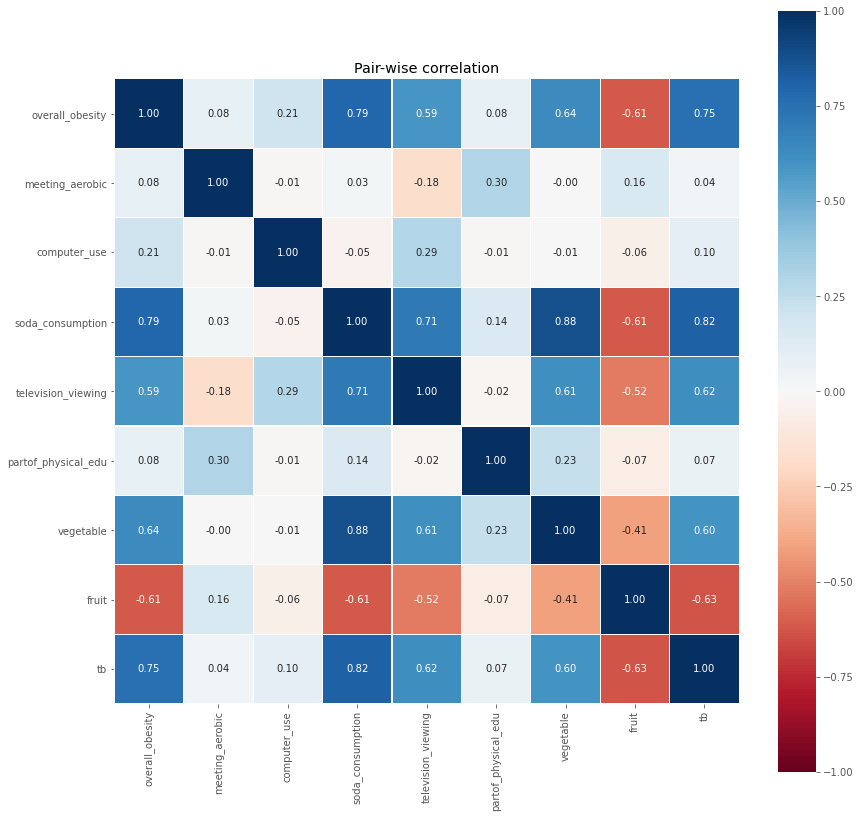

In [193]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,14))
sns.heatmap(result.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True,fmt=".2f")
plt.title('Pair-wise correlation')

In [194]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall_obesity      29 non-null     float64
 1   meeting_aerobic      29 non-null     float64
 2   computer_use         29 non-null     float64
 3   soda_consumption     29 non-null     float64
 4   television_viewing   29 non-null     float64
 5   partof_physical_edu  29 non-null     float64
 6   vegetable            29 non-null     float64
 7   fruit                29 non-null     float64
 8   tb                   29 non-null     float64
dtypes: float64(9)
memory usage: 2.2 KB


In [246]:
 X_values_linear = sm.add_constant(soda_consumption)
y_values_linear= overall_obesity

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     45.82
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.87e-07
Time:                        14:32:04   Log-Likelihood:                -58.348
No. Observations:                  29   AIC:                             120.7
Df Residuals:                      27   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2924      1.192      6.117      0.0

In [220]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No columns dropped because VIF values are below threshold')
            break

    return df

In [221]:

gcd_predictors_selected_VIF = drop_column_using_vif_(result)
print("The columns remaining after VIF selection are:")
print(gcd_predictors_selected_VIF.columns)

Dropping: soda_consumption
No columns dropped because VIF values are below threshold
The columns remaining after VIF selection are:
Index(['computer_use', 'television_viewing', 'meeting_aerobic',
       'partof_physical_edu', 'vegetable', 'fruit', 'tb'],
      dtype='object')


In [222]:
 X_values_linear = sm.add_constant(gcd_predictors_selected_VIF)
y_values_linear= overall_obesity

regression_model_a = sm.OLS(y_values_linear, X_values_linear)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6.576
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           0.000347
Time:                        13:23:14   Log-Likelihood:                -55.904
No. Observations:                  29   AIC:                             127.8
Df Residuals:                      21   BIC:                             138.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0831    

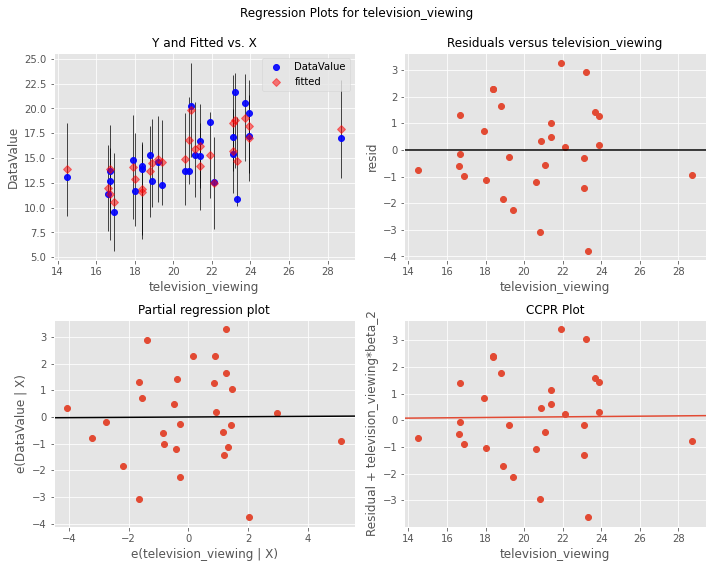

In [238]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(regression_model_b, 'television_viewing',fig=fig)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


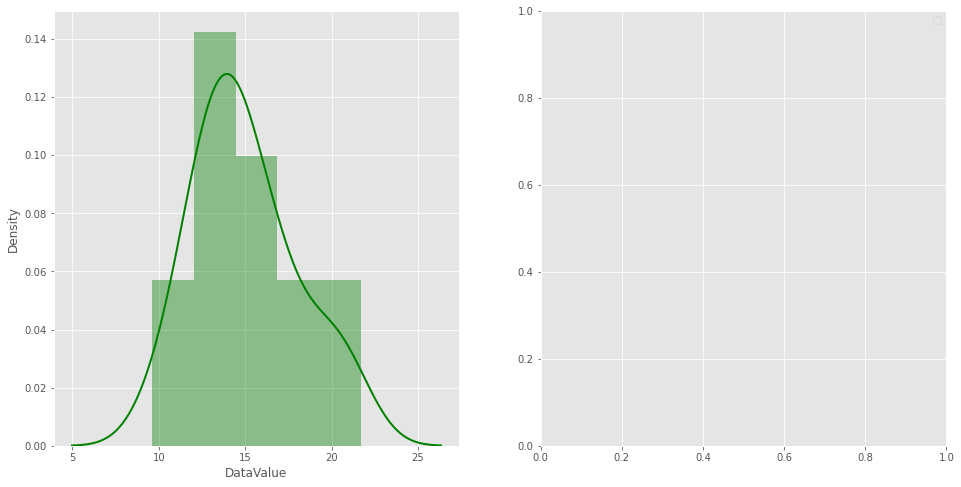

In [233]:
fig, ax = plt.subplots(1, 2)
variable_name = "median_income"
sns.distplot(overall_obesity, hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "asd", color ="green", ax = ax[0])
sns.distplot(fruit, hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "Non-Normal", color ="gray", ax = ax[1]) 
  
sns.distplot(tb, hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "Normal", color ="red", ax = ax[2]) 

sns.distplot(soda_consumption, hist = True, kde = True, 
            kde_kws = {'shade': False, 'linewidth': 2},  
            label = "Normal", color ="red", ax = ax[3]) 
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(8) 
fig.set_figwidth(16)